In [6]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [9]:
class CocaColaStockPrediction:
    def __init__(self, file):
        self.file = file
        self.dataFrame = None

    def importData(self):
        self.dataFrame = pd.read_csv(self.file, parse_dates=['Date'], index_col='Date')
    
    def manipulateData(self):
        headers = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        data = self.dataFrame[headers]
        return data

    # utilizing the data spanning from February 01, 2024 to Feb 06, 2024 (5 days data), in order to train the model 
    # using this dataset and evaluate the model using the test dataset.
    def defineTrainData(self):
        data = self.manipulateData()
        define_x_train_data = data.loc['2024-02-01':'2024-02-06']
        return define_x_train_data
    
    # utilizing test data spanning from Feb 07, 2024 to February 09, 2024 (3 days data) 
    # to evaluate our model's performance.
    def defineTestData(self):
        data = self.manipulateData()
        define_x_test_data = data.loc['2024-02-07':'2024-02-09']
        return define_x_test_data
    
    def normalizeTrainData(self):
        normalize = MinMaxScaler()
        train_data = self.defineTrainData()
        normalizeTrainData = normalize.fit_transform(train_data)
        return normalizeTrainData
    
    def normalizeTestData(self):
        normalizeScaler = MinMaxScaler()
        test_data = self.defineTestData()
        normalizeTestData = normalizeScaler.fit_transform(test_data)
        return normalizeTestData, normalizeScaler
    

    # create training data. Use all columns for x_train (open, high, low, close, adj close) except volume to train the model. 
    # and utilize volume column for y_train
    def inputOutputTrainData(self):
        normalizedTrainData = self.normalizeTrainData()
        X_train = normalizedTrainData[:, :-1]
        y_train = normalizedTrainData[:, -1]
        return X_train, y_train
    
    # create test data for prediction
    def inputOutputTestData(self):
        normalizedTestData, normalizeScaler = self.normalizeTestData()
        X_test = normalizedTestData[:, :-1]
        y_test = normalizedTestData[:, -1]
        return X_test, y_test, normalizeScaler
    
    # train the model
    def BuildAndTrainModel(self):
        X_train, y_train = self.inputOutputTrainData()
        X_test, y_test, normalizeScaler = self.inputOutputTestData()
        X_test_data = self.defineTestData()
        model = Sequential()
        model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(1, activation='linear'))

        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
        
        predictions_scaled = model.predict(X_test)

        meanSquaredError = mean_squared_error(y_test, predictions_scaled)
        print(f"Mean Squared Error For Coca Cola Stock Market (with 7 days data history) is: {meanSquaredError}")
        predictions_original_scale = normalizeScaler.inverse_transform(np.concatenate([X_test, predictions_scaled], axis=1))[:, -1]

        # Visualize predictions
        plt.figure("Coca Cola Company Stock Market (with 7 days data history) Prediction")
        plt.plot(X_test_data.index, predictions_original_scale, label='Predicted Volume')
        plt.plot(X_test_data.index, X_test_data['Volume'], label='Actual Volume')
        plt.legend()
        plt.show()

Epoch 1/50
1/1 [==============================] - 1s 504ms/step - loss: 0.3113 - val_loss: 0.3760
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3030 - val_loss: 0.3783
Epoch 3/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2954 - val_loss: 0.3797
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2883 - val_loss: 0.3801
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 0.2814 - val_loss: 0.3797
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 0.2748 - val_loss: 0.3784
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 0.2683 - val_loss: 0.3762
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 0.2619 - val_loss: 0.3730
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2556 - val_loss: 0.3691
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 0.2492 - val_loss: 0.3644
Epoch 11/50
1/1 [===========

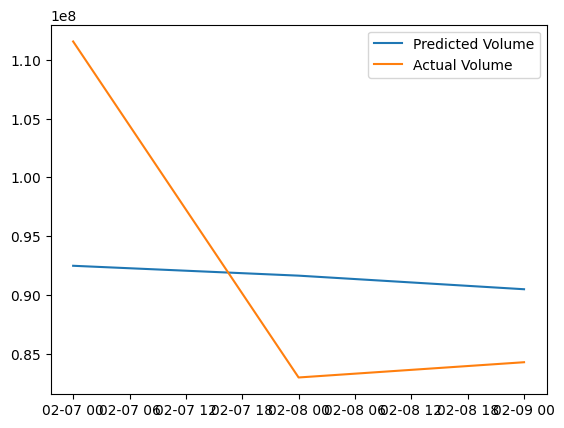

In [10]:
CocaCola_Inc_path = '/Users/eyosiasdesta/AIProjects/StockMarketPrediction/StockMarketPrediction/TSLA.csv'
cocacola_stock = CocaColaStockPrediction(CocaCola_Inc_path)
cocacola_stock.importData()
cocacola_stock.BuildAndTrainModel()